# Triangles and TV
---

TODO: Table of contents

<br>
<br>
<br>
<br>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [17]:
%matplotlib notebook
%matplotlib inline

np.random.seed(seed=0)

In [18]:
testing=False
# testing=True

## Triangles and Barycentric Coordinates
---

<br>
<br>
<br>


In [6]:
def getAreaOfATriangle(corners, debug=False):
    r""" 
    Returns the area of the cartesian triangle with corners given
    
     Parameters: 
        corners - a numpy array of shape [3 verticies, 3 cartesians]
    """
    α1 = np.arccos(np.clip(np.dot(corners[0,:], corners[1,:]), -1.0, 1.0))
    α2 = np.arccos(np.clip(np.dot(corners[0,:], corners[2,:]), -1.0, 1.0))
    α3 = np.arccos(np.clip(np.dot(corners[2,:], corners[1,:]), -1.0, 1.0))

    
    A = -1    
    if(α1!=0):# and α1!=np.pi/2):
#         A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[1,:], axis=1))
        A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[1,:]))
        if(debug): print("A", A)
    elif(α2!=0):# and α2!=np.pi/2):
        A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[2,:]))
#         A = 0.5*np.linalg.norm(np.cross(corners[0,:],corners[2,:], axis=1))
        
        if(debug): print("A", A)
    elif(α3!=0 ):#and α3!=np.pi/2):
#         A = 0.5*np.linalg.norm(np.cross(corners[2,:],corners[1,:], axis=1))
        A = 0.5*np.linalg.norm(np.cross(corners[2,:],corners[1,:]))
        if(debug): print("A", A)
    
    return A
    
    

def cartesian_to_barycentric(triangle, point, wrap_gamma=False, debug=False):
    r"""
    Barycentric coordinates are defined for a point P as: {ϕ_1 v_1 + ϕ_2 v_2 + ϕ_3 v_3} for verticies v_1 to v_3 
    where ϕ_i = A_i/A
        A_1 being the area of the triangle with verticies P, v_2, v_3. 
        A is the total area of the triangle v_1, v_2, v_3
        
        
    Parameters: 
        triangles - a numpy array of shape (3 verticies, 3 cartesians)
        point - the point on the triangle
    
    Returns: 
        Signed Barycentric Coordinates (1,3)
    """
    
#     v1 = triangle[0,:].reshape((1,3))
#     v2 = triangle[1,:] .reshape((1,3))
#     v3 = triangle[2,:].reshape((1,3))
    v1 = triangle[0,:]
    v2 = triangle[1,:]
    v3 = triangle[2,:]
    if(debug):  print("v1:", v1)
    if(debug):  print("v2:", v2)
    if(debug):  print("v3:", v3)
        
    # the unit normal n
    n = np.cross((v2- v1), (v3 - v1))
    if(debug):  print("n",n)
    n_norm_sq = np.linalg.norm(n)**2
    if(debug):  print("|n|^2",n_norm_sq)
        
    n1 = np.cross((v3 - v2), (point - v2 ))
    phi_1 = np.dot(n,n1.T)/n_norm_sq
    
    n2 = np.cross((v1 - v3), (point - v3))
    phi_2 = phi_1 = np.dot(n,n2.T)/n_norm_sq
        
    if wrap_gamma:
        phi_3 = 1-phi_1-phi_2
    else:
        n3 = np.cross((v2 - v1), (point - v1))
        phi_3 = phi_1 = np.dot(n,n3.T)/n_norm_sq
    
    
    if(debug):  print("phi1:", phi_1)
    if(debug):  print("phi2:", phi_2)
    if(debug):  print("phi3:", phi_3)
        
    
#     return np.array((phi_1.item(), phi_2.item(), phi_3.item())).reshape(1,3)
    return np.array((phi_1, phi_2, phi_3)).T

# Need to make this vectorised

In [7]:
def barycentric_to_cartesian(bcs, corners = np.nan, debug=False):
    r"""
        Returns the cartesian coordinates of the barycentric points given the cartesian coordinates of the corners.
        
        
        Parameters:
            bcs - The barycentric coordinate sets [n, 3].
            corners - Cartesian coordinates of the corners of the triangle [3 corners, 3 coordinates]
    
    """
    
#     bcs_rect = np.hstack((bcs[:,:2], (1-bcs[:,0] - bcs[:,1]).reshape((bcs.shape[0],1))))
#     return  bcs_rect@corners
    if bcs.ndim>1:
            cart =  bcs[:,0].reshape((-1,1))*corners[0].reshape((1,-1)) +\
                bcs[:,1].reshape((-1,1))*corners[1].reshape((1,-1)) +\
                bcs[:,2].reshape((-1,1))*corners[2].reshape((1,-1))
    else:
            cart =  bcs[0].reshape((-1,1))*corners[0].reshape((1,-1)) +\
                bcs[1].reshape((-1,1))*corners[1].reshape((1,-1)) +\
                bcs[2].reshape((-1,1))*corners[2].reshape((1,-1))        
    return cart

In [19]:
if testing:
    tri = np.array([[2,2,1],
                    [1,1,3],
                    [1,0,0]])
    # tri = np.array([[2,2,0],
    #                 [1,0,0],
    #                 [0,1,0]])


    # pt = [0.5, 1, 0]
    pt = np.sum(tri, axis=0)/3
    print(pt)

    tmp = cartesian_to_barycentric(tri, pt, wrap_gamma=False)#,debug=True)

    print("BCs:", tmp)
    print("Sum of BCs:", np.sum(tmp))


    test = np.vstack((np.ones((1,3))*1/3,np.eye(3))) #testing with midpoint and all verticies
    print("Test Barycentric Coords:]\ŋ",test)
    x = barycentric_to_cartesian(test, tri, debug=True)
    print("3D:\n",x)

## !!!Note!!!
---
There is an error when getting the cartesian coordinates for BC(1, 0, 0)

All others seem to work

In [20]:
if testing:
    test = np.vstack((np.ones((1,3))*1/3,np.eye(3))) #testing with midpoint and all verticies
    print("Test Barycentric Coords:\n",test)

    x = barycentric_to_cartesian(test, tri, debug=True)
    print("3D:\n",x)

    print("Back to Cartesian:")
    print(cartesian_to_barycentric(tri, x, debug=False, wrap_gamma=False))

### Default example using barycentric coordinates to color triangles

<br>
<br>
<br>

In [21]:
if testing:
    n_pts = 1000 # initial random number of points
    np.random.seed(seed=1)
    bc_pts = np.random.randint(0,100,(n_pts,2))/100
    bc_pts = np.hstack((bc_pts,(1 - bc_pts[:,0] - bc_pts[:,1]).reshape((n_pts,1))))
    bc_pts = bc_pts[((bc_pts>=0).sum(axis=1)-2).astype(bool)] # Selecting points in the triangle

    pts = barycentric_to_cartesian(bc_pts,corners=tri)


    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    for p in range(pts.shape[0]):
        #     Plot each point with a colour defined by the points
        rgb = ([255,255,255]*bc_pts[p]).astype(tuple).astype(int)
        hex_c = '#{:02X}{:02X}{:02X}'.format(*rgb)
        ax.plot([pts[p,0]], [pts[p,1]], [pts[p,2]], 'o', c=hex_c, 
                markersize=8, alpha=0.5)  

    for corner in tri:
        #     Plotting corner points
        pt = cartesian_to_barycentric(tri, corner)
        rgb = ([255,255,255]*pt).astype(tuple).astype(int)
        hex_c = '#{:02X}{:02X}{:02X}'.format(*rgb)
        ax.plot([corner[0]], [corner[1]], [corner[2]], 'o', c=hex_c,  
                markersize=10, alpha=0.5)     

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Total Variation in a triangular mesh
---

Total variation has been shown to be a powerful regulariser that is often used in image processing. 

Here it will be implemented on a mesh of points.

<br>
<br>
The equation for the total c
<br>

The equation for discrete total variation (DTV) is:
\begin{equation}
|u|_{DT V (Ω)} :=
\sum_T
\int_T
\mathcal{I}_T \{|∇u|_s\} dx +
\sum_E \int_E
\mathcal{I}_E\{|[[u]]_s\}dS
\end{equation}

where $[[u]]$ denotes the vector-valued jump of a function in normal direction across an interior
edge of the triangulation

## Setup:

In [22]:
import GenerateMesh 
from scipy.spatial import Delaunay
from scipy.spatial import ConvexHull

In [23]:
tot = 200
num_ctrl_pts = int(tot*0.1)
ctrl_indx = np.random.randint(0,high=tot, size=num_ctrl_pts)
non_ctrl_indx = np.setdiff1d(np.arange(tot), ctrl_indx)


pt_mesh = GenerateMesh.generatePoints(total_num=tot, x_dim=100, y_dim=100)
ctrl_pts = pt_mesh[ctrl_indx].copy()
pt_mesh = pt_mesh[non_ctrl_indx]
ctrl_tri = Delaunay(ctrl_pts)



pt_mesh_3d = GenerateMesh.generatePoints(total_num=tot, x_dim=100, y_dim=100,z_dim=10) #GenerateMesh.makeGrid()
ctrl_pts_3d = pt_mesh_3d[ctrl_indx].copy()
pt_mesh_3d = pt_mesh_3d[non_ctrl_indx]
ctrl_tri_3d = Delaunay(ctrl_pts_3d[:,:2]) #2D triangulation

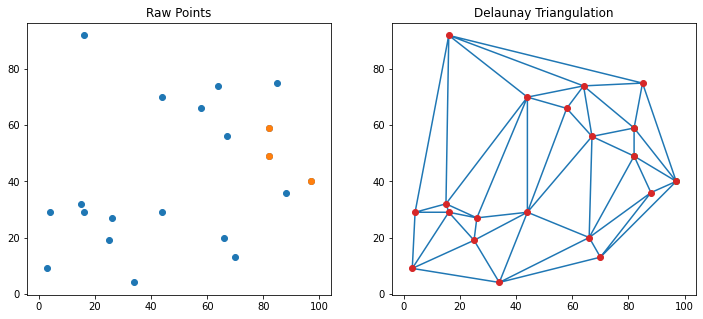

In [58]:


fig_tri, ax_tri = plt.subplots(1,2, figsize=(12,5))

# ax_tri.plot(pt_mesh[1,0], pt_mesh[1,1], 'or')
# ax_tri[0].triplot(ctrl_pts[:,0], ctrl_pts[:,1], ctrl_tri.simplices)
ax_tri[0].plot(ctrl_pts[:,0], ctrl_pts[:,1], 'o')
ax_tri[0].plot(ctrl_pts[ctrl_tri.simplices[-1]][:,0], ctrl_pts[ctrl_tri.simplices[-1]][:,1], 'o')

ax_tri[1].triplot(ctrl_pts[:,0], ctrl_pts[:,1], ctrl_tri.simplices)
ax_tri[1].plot(ctrl_pts[ctrl_tri.simplices[-1]][:,0], ctrl_pts[ctrl_tri.simplices[-1]][:,1], 'o')
ax_tri[1].plot(ctrl_pts[:,0], ctrl_pts[:,1], 'o')

ax_tri[0].set_title("Raw Points")
ax_tri[1].set_title("Delaunay Triangulation")

ax_tri[0].axis('equal')
ax_tri[1].axis('equal')


plt.show()

In [25]:
def find_closest_triangles(pts, tris):
    r"""
    Finds the points closest triangle and returns them. 
    If the point is in a triangle then it returns the containing triangle.
    
    Parameters:
        pts:    numpy array of points to check (n,2) or (n,3)
        tris:    Triangles (found in the Delaunay triangulation). ndarray (n,3)
    
    
    Returns:
        closest_tris:    Closest triangle to each point, ordered in the same way as pts. ndarray (n,3)
    
    """
    
    simps = tris.find_simplex(pts) # finds the simplex by points. This handles most of the work but does not find anything if pt is outside the triangles.
    tmp_smp = tris.simplices.copy()
    
    return np.vstack((tmp_smp,[-1,-1,-1]))[[ctrl_tri.find_simplex(pt_mesh)]]    

In [26]:
def simplices_to_verticies(Delaunay_mesh_pts, simplicies, unique=False):
    r"""
    Returns the coordinates for each simplex in cartesian coordinates.
    
    NB: mesh_pts must be in the same order used for the Delaunay triangulation
    
    """
    # extract indicies/simplices
    # find corresponding vertex coordnates
    # stack into (n,3,3)
    # return.
    if not unique:
        return Delaunay_mesh_pts[simplicies]    
    else:
        return Delaunay_mesh_pts[np.unique(simplicies)]
    
def get_cartesian_triangles(Delaunay_mesh_pts, Delaunay_tri, unique=False):
    r"""
    Returns the coordinates for each triangle in cartesian coordinates.
    NB: mesh_pts must be in the same order used for the Delaunay triangulation
    
    """
    return ctrl_pts[ctrl_tri.vertices]

In [27]:
if True:
    simps = ctrl_tri.simplices
    u_simps = np.unique(simps)
    assert np.all(np.equal(ctrl_pts[u_simps], simplices_to_verticies(ctrl_pts, simps, unique=True)))
    print("Passed")

Passed


In [28]:
def get_triangle_normal(triangle_cartestian, unit=False):
    r"""
    
    Parameters:
        triangle_cartesian: ndarray (n, 3, 2D/3D)
                Verticies of the triangle in 2D/3D space
            
    Returns:
        normal: ndarray (1,2/3)
            Normal to the triangle
    """
    tri = triangle_cartestian.copy()
    tri = tri.reshape((-1,3,3))
    n = np.cross((tri[::,1] - tri[::,0]), (tri[::,2]-tri[::,0]))
    if np.ndim(n)== 1:
            norm = normalize(n, axis=0)
    else:
            norm =  normalize(n.reshape(1, -1))
            norm = normalize(n)
    
            
            
    if unit:
        return norm
    
    else:
        return n

    

/tmp/ipykernel_5590/3183722373.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


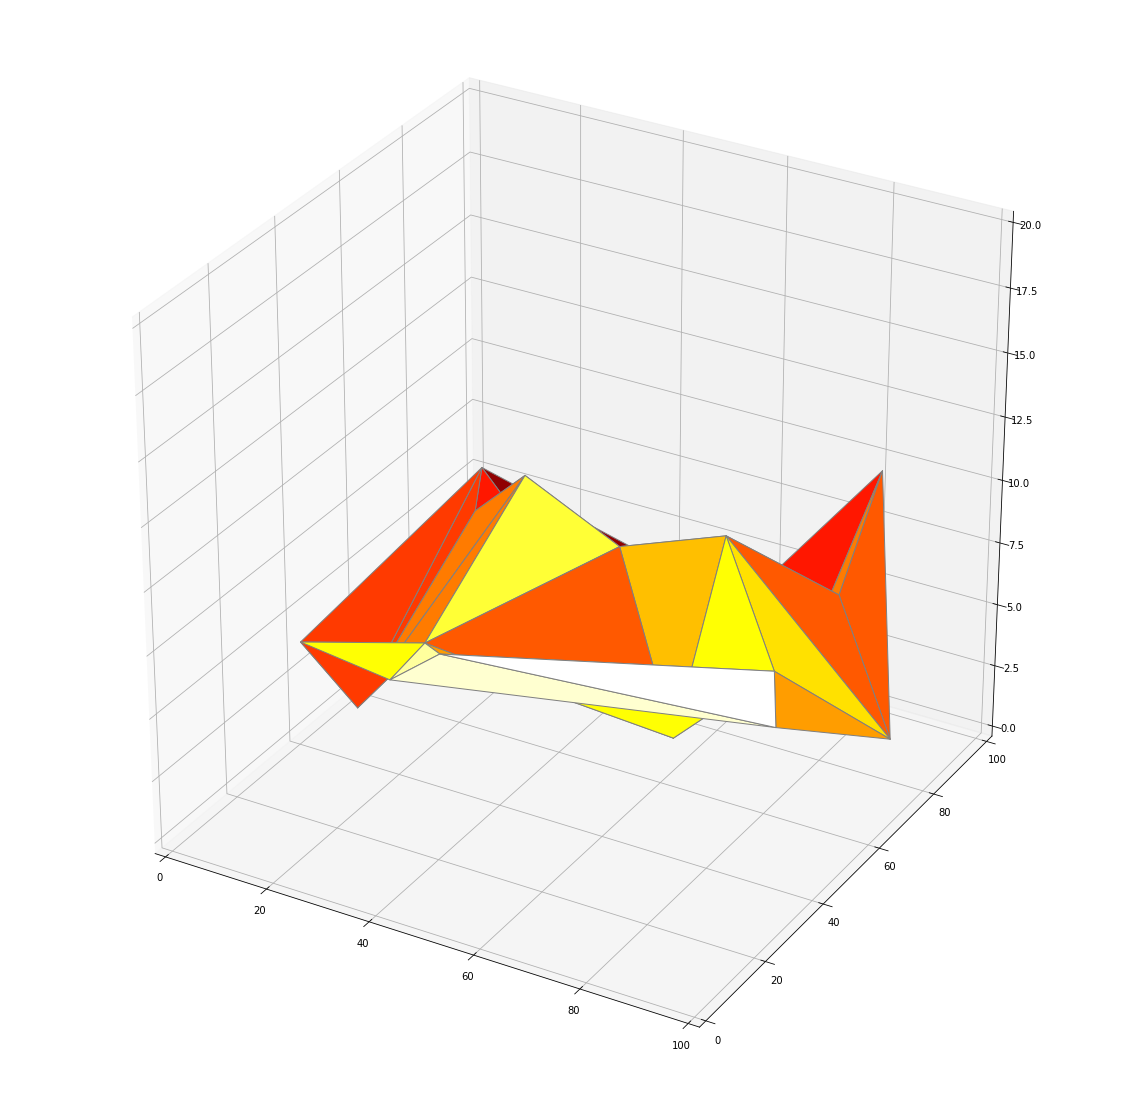

In [80]:
tri_num = ctrl_tri_3d.simplices.max()//2
tmp = ctrl_pts_3d[ctrl_tri_3d.simplices[tri_num]]
fig = plt.figure( figsize=(20,20))
ax = fig.add_subplot(1,1,1,projection='3d')
# Plot triangles
# ax.plot_trisurf(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], ctrl_pts_3d[:,2],color='none', edgecolor='grey',triangles=ctrl_tri_3d.simplices)

my_cmap = plt.get_cmap('hot')


ax.plot_trisurf(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], ctrl_pts_3d[:,2], cmap=my_cmap, edgecolor='grey',triangles=ctrl_tri_3d.simplices)

# ax.plot_trisurf(tmp[:,0], tmp[:,1], tmp[:,2], color='red')#,triangles=[0,1,2])

midpoint = barycentric_to_cartesian(np.array([1/3, 1/3, 1/3]), tmp)
normal = get_triangle_normal(tmp, unit=True)
endpoint = normal*midpoint

# ax.quiver3D(midpoint[:,0], midpoint[:,1], midpoint[:,2], endpoint[:,0], endpoint[:,1],endpoint[:,2], color='b')

ax.set_xlim(0,ctrl_pts_3d.max())
ax.set_ylim(0,ctrl_pts_3d.max())
ax.set_zlim(0,ctrl_pts_3d[:, 2].max()*2)


ax.view_init(50,60)

fig.show()

/tmp/ipykernel_5590/1599929498.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


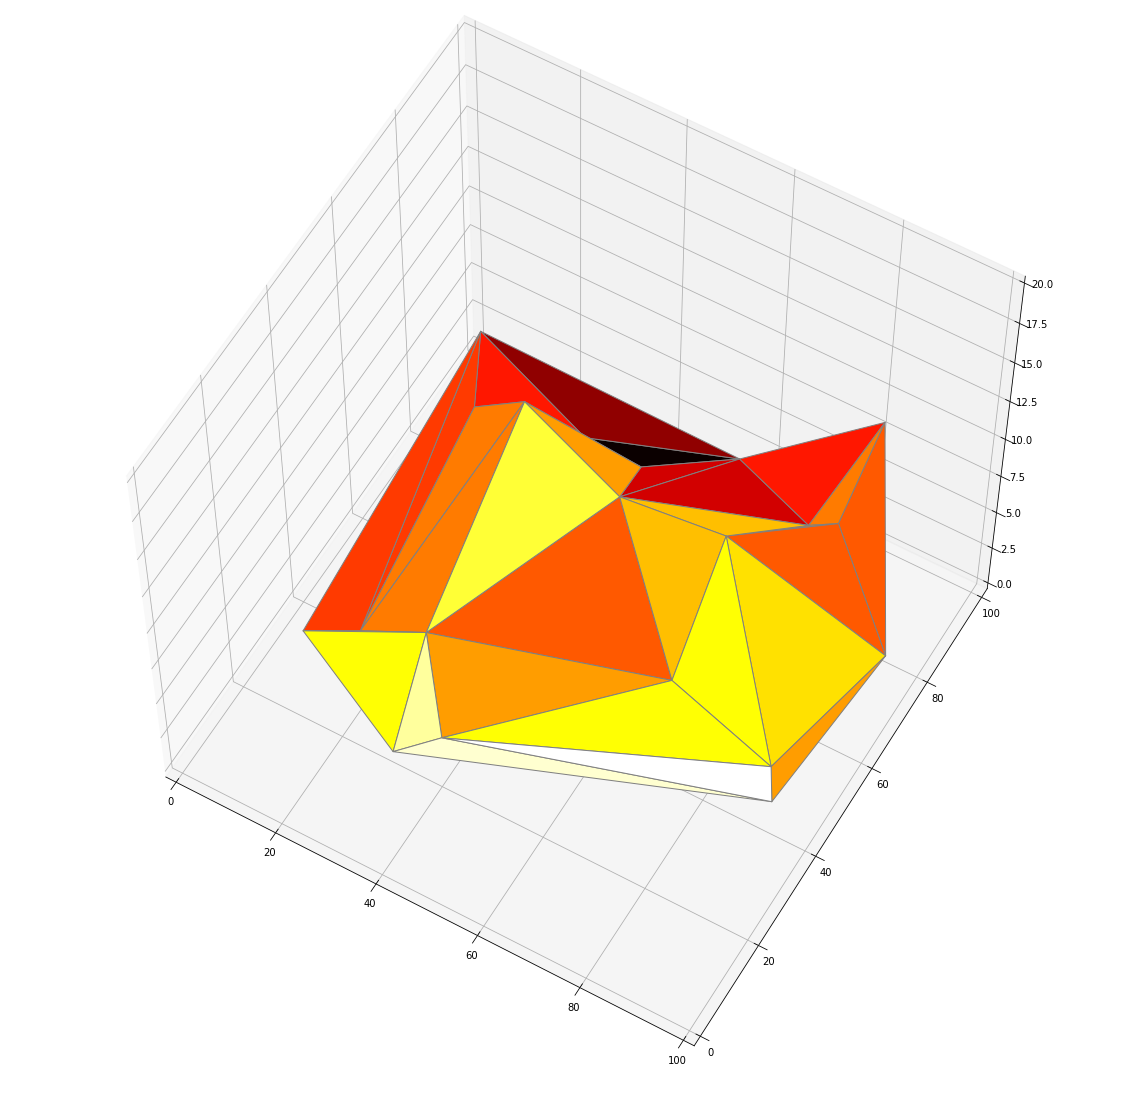

In [87]:
tri_num = ctrl_tri_3d.simplices.max()//2
tmp = ctrl_pts_3d[ctrl_tri_3d.simplices[tri_num]]
fig = plt.figure( figsize=(20,20))
ax = fig.add_subplot(1,1,1,projection='3d')
# Plot triangles
# ax.plot_trisurf(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], ctrl_pts_3d[:,2],color='none', edgecolor='grey',triangles=ctrl_tri_3d.simplices)

my_cmap = plt.get_cmap('hot')


ax.plot_trisurf(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], ctrl_pts_3d[:,2], cmap=my_cmap, edgecolor='grey',triangles=ctrl_tri_3d.simplices)

# ax.plot_trisurf(tmp[:,0], tmp[:,1], tmp[:,2], color='red')#,triangles=[0,1,2])

midpoint = barycentric_to_cartesian(np.array([1/3, 1/3, 1/3]), tmp)
normal = get_triangle_normal(tmp, unit=True)
endpoint = normal*midpoint

# ax.quiver3D(midpoint[:,0], midpoint[:,1], midpoint[:,2], endpoint[:,0], endpoint[:,1],endpoint[:,2], color='b')

ax.set_xlim(0,ctrl_pts_3d.max())
ax.set_ylim(0,ctrl_pts_3d.max())
ax.set_zlim(0,ctrl_pts_3d[:, 2].max()*2)


ax.view_init(60,-60)

fig.show()

/tmp/ipykernel_5590/4109449748.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


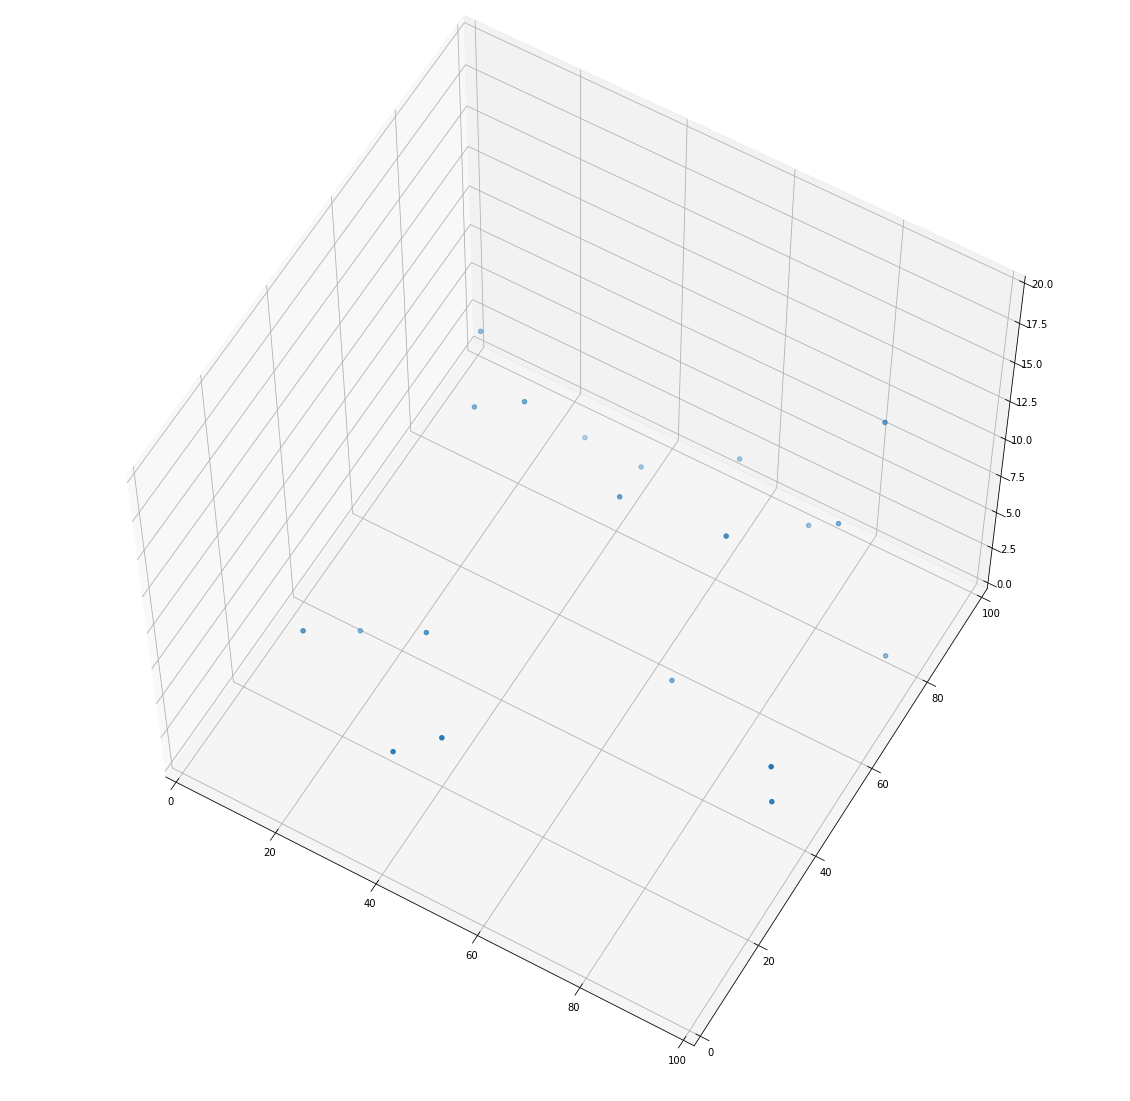

In [88]:
tri_num = ctrl_tri_3d.simplices.max()//2
tmp = ctrl_pts_3d[ctrl_tri_3d.simplices[tri_num]]
fig = plt.figure( figsize=(20,20))
ax = fig.add_subplot(1,1,1,projection='3d')
# Plot triangles
# ax.plot_trisurf(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], ctrl_pts_3d[:,2],color='none', edgecolor='grey',triangles=ctrl_tri_3d.simplices)
ax.scatter(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], ctrl_pts_3d[:,2])

# ax.plot_trisurf(tmp[:,0], tmp[:,1], tmp[:,2], color='red')#,triangles=[0,1,2])

# midpoint = barycentric_to_cartesian(np.array([1/3, 1/3, 1/3]), tmp)
# normal = get_triangle_normal(tmp, unit=True)
# endpoint = normal*midpoint

# ax.quiver3D(midpoint[:,0], midpoint[:,1], midpoint[:,2], endpoint[:,0], endpoint[:,1],endpoint[:,2], color='b')

ax.set_xlim(0,ctrl_pts_3d.max())
ax.set_ylim(0,ctrl_pts_3d.max())
ax.set_zlim(0,ctrl_pts_3d[:, 2].max()*2)

ax.view_init(60,-60)


fig.show()

In [60]:
ctrl_pts_3d.max(axis=0)

array([100,  95,  10])

## Total Variation Using skimage
---

<br>
<br>
<br>
<br>
<br>
<br>

In [30]:
try:
    from skimage.restoration import denoise_tv_chambolle
except ImportError:
    # skimage < 0.12
    from skimage.filters import denoise_tv_chambolle

from PIL import Image as im


In [31]:
pt_mesh = GenerateMesh.generatePoints(total_num=200, x_dim=100, y_dim=100)
ctrl_pts = pt_mesh[0::10].copy()
pt_mesh = pt_mesh[np.arange(len(pt_mesh))%10>0] # remove control points from the mesh
ctrl_tri = Delaunay(ctrl_pts)

pt_mesh_3d = GenerateMesh.generatePoints(total_num=200, x_dim=100, y_dim=100,z_dim=10) #GenerateMesh.makeGrid()
ctrl_pts_3d = pt_mesh_3d[0::10].copy()
pt_mesh_3d = pt_mesh_3d[np.arange(len(pt_mesh_3d))%10>0] # remove control points from the mesh
ctrl_tri_3d = Delaunay(ctrl_pts_3d[:,:2])

In [32]:
#  pt_mesh_3d
use_nan=False

In [33]:
x_dim=np.nan
y_dim=np.nan
if np.isnan(x_dim) or np.isnan(y_dim):
    x_dim, y_dim,_ = np.max(pt_mesh_3d, axis=0)

if use_nan:
    grid = np.empty((x_dim+1, y_dim+1))
    grid[:] = np.nan
else:
    grid = np.zeros((x_dim+1, y_dim+1))
        

grid[pt_mesh_3d[:,0],pt_mesh_3d[:,1]] = pt_mesh_3d[:,2]
(np.isfinite(grid)).sum()

10201

In [34]:
tmp_im = im.fromarray(grid,)
tmp =np.array(tmp_im)
tmp[np.isfinite(tmp)].max()  # if 10 then image preserves z axis


10.0

In [35]:
tv_denoised = denoise_tv_chambolle(tmp, weight=10)

Text(0.5, 1.0, 'After scipy TV Chambolle')

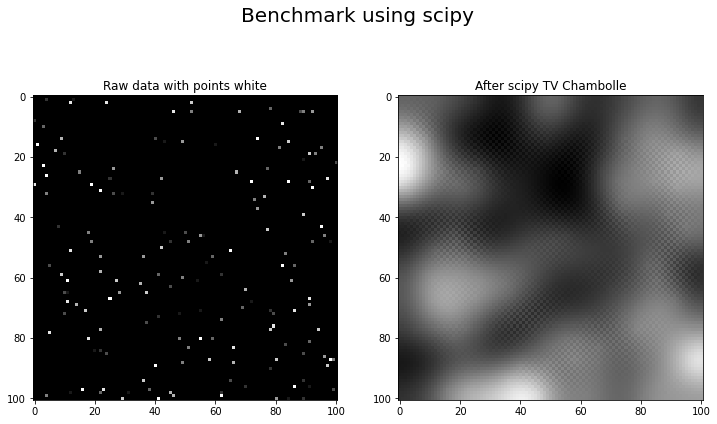

In [36]:
# denoise_tv_chambolle()
fig_m=plt.figure(figsize=(12,7))
fig_m.tight_layout(pad=3.0)
fig_m.suptitle("Benchmark using scipy",fontsize=20, verticalalignment='top')
ax_m = fig_m.add_subplot(121)
ax_m.imshow(grid, cmap=plt.cm.gray, interpolation='nearest')
ax_m.set_title("Raw data with points white")

ax_tv = fig_m.add_subplot(122)
ax_tv.imshow(tv_denoised,cmap=plt.cm.gray, interpolation='nearest')
ax_tv.set_title("After scipy TV Chambolle")

In [37]:
tv_denoised[np.isfinite(tv_denoised)].min()

0.022859838

## Coding the TV from scratch
---
<br>
<br>

Credit to @Paul Amayo for some of the code.



In [38]:
L_conv = 200  # number of iterations (convex loop, non-convex inner loop)
λ_tv = 2.0  # data term weighting
τ = 0.125  # primal step size
σ = 0.125  # dual step size
θ = 1  # extra gradient step size



In [39]:
# def TV_optimisation(z, edges, L_conv, p, σ, τ, λ_tv, θ):
#     # initilise variables
#     x = np.copy(z)  # main primal variable
#     p = np.zeros((len(edges), 1))  # main dual variable
#     x_bar = np.copy(x)  # extra-gradient variable

#     for k in range(L_conv):
#         x_prev = np.copy(x)
#         p_prev = np.copy(p)

#         # ------------------------- DUAL STEP -------------------------
#         for i in range(0, len(edges)):
#             u_p = p[i][0] + σ * (x_bar[edges[i][1]][0] - x_bar[edges[i][0]][0])
#             p[i][0] = u_p / max(abs(u_p), 1)

#         # ------------------------ PRIMAL STEP -----------------------
#         for i in range(0, len(edges)):
#             x[edges[i][0]][0] += τ * (p[i][0])
#             x[edges[i][1]][0] -= τ * (p[i][0])
#         # MUST CHOOSE EITHER L1 norm or L2 norm (UNCOMMENT THE RELAVENT LINES)
#         # NB OBSERVATION FOR L1 norm vs L2 norm: to get better results for L1 norm, lower value of λ and increase number of iterations

#         # L1 norm data term
#         if L1:
#             f = lambda zi, xi: (xi - λ_tv*τ if (xi-zi) > λ_tv*τ else (xi + λ_tv*τ if (xi-zi) < - λ_tv*τ else xi))
#             x = np.array([f(zi,xi) for zi,xi in zip(np.squeeze(np.array(z)),np.squeeze(np.array(x)))]).reshape(len(x),1)
#         else:
#             # L2 norm data term
#             x = (x + λ_tv * τ * z) / (1 + λ_tv * τ)
#         # ------------- EXTRA GRADIENT STEP (RELAXATION) -------------
#         x_bar = x + θ * (x - x_prev)

#     return x


## Using Discrete Total Variation with Finite Elements and Applications to Imaging:

In [40]:
# max_num_iterations=100

# p = np.zeros((_,1)) # Primal variable
# μ = np.zeros((max_num_iterations,1)) # dont think this is nx1
# n = 0

# for i in np.arange(max_num_iterations):#(int i=0; i<max_num_iteration; i++):
#     A1_T = 
    
    
#     # Check convergence
#         #break

## Local Barycentric Coordinates TV

---

<br>
<br>

The equation for TV defined in LBC is:

\begin{equation}
\begin{split}
\min_{w_1, ..., w_n} & \sum^n_{i=1} \int_\Omega |\nabla w_i| \\
s.t. & \sum^n_{i=1} w_i(X)c_i = x, \sum^n_{i=1} w_i =1, w_i \ge0, Ax \in \Omega,\\
& w_i(c_j) = \delta_{ij} Ai,j\\
& w_i \text{ is linear on cage edges and faces } ∀i.
\end{split}
\end{equation}

TODO fix A symbols.


In [41]:
def check_ctrl_pts(ctrl, mesh, fix_ctrl=False):
    r"""
    Check that there are no mesh points outside of the control region.
    
    If fix:
        make mesh points outside the control region into control points.
    """
    
    perimeter = mesh[ConvexHull(mesh).vertices]   
    
    if fix_ctrl:
        ctrl_new = ctrl.copy()
        
        idx = []
        for i in range(perimeter.shape[0]):
            idx = np.where(((np.abs(ctrl-perimeter[i])==0).sum(axis=1)==perimeter.shape[1])==True)
            if np.size(idx): #if an index is found
                ctrl_new = np.vstack((ctrl_new, perimeter[i]))
#         print("Fixed Control points")
        return ctrl_new
    
    else:
        return perimeter

def grad_bc(points, tri_pts, triangulation):
    # get ∇w_i
#     take points
    tri_key = triangulation.find_simplex(points[:,:2])
    assert np.all(tri_key>=0)
    zs = tri_pts[triangulation.simplices][:, :,2]
    zs = zs[tri_key]
    bc_pts = get_general_barycentric(triangulation, points)
    nabla = zs - zs*bc_pts
    return nabla


def get_general_barycentric(tri, pts):
    bcs = np.zeros((pts.shape[0], 3))
    for i in range(pts.shape[0]):                   
        pt = pts[i,:2]    
        t = tri.find_simplex(pt)
        b = tri.transform[t,:2].dot(np.transpose(pt.reshape((1,-1)) - tri.transform[t,2]))
        bcs[i] = np.c_[np.transpose(b), 1 - b.sum(axis=0)]
    return bcs
    
def getTriangleAreas(triangle_corners):
    t = triangle_corners.reshape((-1,3,3))
    return ((1/2)*np.linalg.norm(np.cross(t[::,1]-t[::,0], t[::,2] - t[::,0]), axis=1))
    

def minimise_LBC():
    pass


def get_TV(points, tri_pts, tri, use_Area = True):
    r"""
    Returns J = \int_\Omega{A|\nabla f(x)|}dx
    
    Parameters:
        w_whole: ndarray (n, 3)
                Set of all barycentric coordinates <<<<<<<<< Not sure on where set is in >>>>>>>>>>
            
    TODO COMPLETE
    """ 
    tri_key = tri.find_simplex(points[:,:2])
    nabla_ws = grad_bc(points, tri_pts, tri)
    if use_Area:
        areas = getTriangleAreas(tri_pts[tri.simplices])[tri_key]
        J = areas*np.sum(nabla_ws)
        
    else:
        J = np.sum(nabla_ws)
    return J



get_TV(ctrl_pts_3d, ctrl_pts_3d, ctrl_tri_3d)

array([ 40308.46019758,  11925.53967332,  33358.32777583,  54163.40264422,
       130527.3687297 ,  73335.67447361, 174773.83340835,  26475.25758609,
        32360.39584121, 130527.3687297 , 130527.3687297 ,  93527.5928697 ,
        56617.76336319,  32360.39584121, 161503.60900457,  48836.42569845,
        33244.20082511,  25541.66014573,  75786.66536568,  31394.50494115])

Gradient = $[z1, z2, z3] - [\phi_1 z1, \phi_2 z2, \phi_3 z3]$


Random control pts TV: 1397095.8158441281
Perimeter control pts TV: 1240817.5120367825
Combined control pts TV: 2839760.666863435


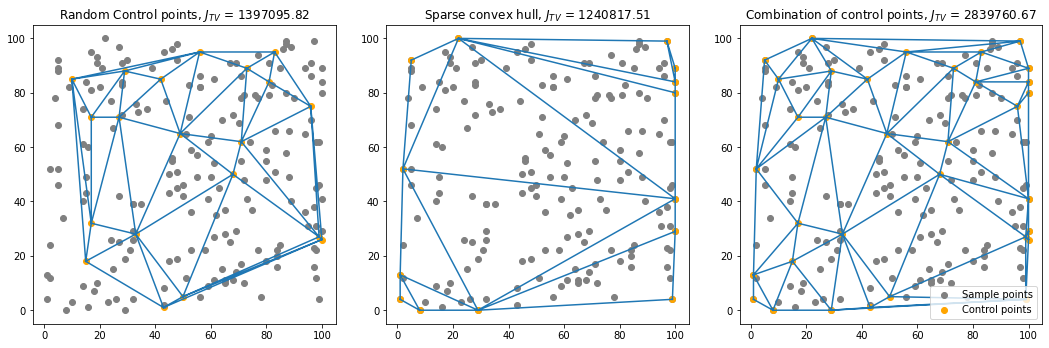

In [42]:

TV_rand=get_TV(ctrl_pts_3d, ctrl_pts_3d, ctrl_tri_3d).sum()
print("Random control pts TV:",TV_rand) # TV using random control points


tmp = check_ctrl_pts(ctrl_pts_3d, pt_mesh_3d)
tmp_tri = Delaunay(tmp[:,:2])
tmp = tmp[np.unique(tmp_tri.convex_hull)]
tmp_tri = Delaunay(tmp[:,:2])


TV_perim = get_TV(tmp, tmp, tmp_tri).sum()
print("Perimeter control pts TV:", TV_perim)


comb_ctrl = np.vstack((tmp, ctrl_pts_3d))
comb_tri = Delaunay(comb_ctrl[:,:2])
w_comb = get_general_barycentric(comb_tri, pt_mesh_3d[:,:2])
TV_comb = get_TV(comb_ctrl, comb_ctrl, comb_tri).sum()
print("Combined control pts TV:", TV_comb)



fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.tight_layout(pad=2.0)
x = tmp_tri.points[tmp_tri.vertices][:,:,0].ravel()
y = tmp_tri.points[tmp_tri.vertices][:,:,1].ravel()
ax[1].triplot(x, y)
ax[1].scatter(pt_mesh_3d[:,0], pt_mesh_3d[:,1], color='gray', label="Sample points")
ax[1].scatter(tmp[:,0], tmp[:,1], color='orange', label="Control points")
ax[1].set_title(f"Sparse convex hull, $J_{{TV}}$ = {TV_perim:.2f}")
# ax[1].legend(loc="lower right")

x = ctrl_tri_3d.points[ctrl_tri_3d.vertices][:,:,0].ravel()
y = ctrl_tri_3d.points[ctrl_tri_3d.vertices][:,:,1].ravel()
ax[0].triplot(x, y)
ax[0].scatter(ctrl_pts_3d[:,0], ctrl_pts_3d[:,1], color='orange')
ax[0].scatter(pt_mesh_3d[:,0], pt_mesh_3d[:,1], color='gray')
ax[0].set_title(f"Random Control points, $J_{{TV}}$ = {TV_rand:.2f}")


x = comb_tri.points[comb_tri.vertices][:,:,0].ravel()
y = comb_tri.points[comb_tri.vertices][:,:,1].ravel()
ax[2].triplot(x, y)
ax[2].scatter(pt_mesh_3d[:,0], pt_mesh_3d[:,1], color='gray', label="Sample points")
ax[2].scatter(comb_ctrl[:,0], comb_ctrl[:,1], color='orange', label="Control points")
ax[2].set_title(f"Combination of control points, $J_{{TV}}$ = {TV_comb:.2f}")
ax[2].legend(loc="lower right")
